## Business Context

** All the data science activities reside in a certain business context and serve specific business drivers. I would like to simulate a business context for this homework to help me to drive the solution **

I assume our client is a national chain of vet clinics which are specialised in cat's health care services. The client has been in business for many years and has a group of loyal customers.  

The client wants to strengthen their trust relationship with his customers and would like to provide personalised customer service to the pets owners, to generate the stickiness for the business, as well as discover up-selling opportunities. 

To serve the purpose, the client is in discussion with Capgemini Invent to consult how could they achieve this vision by using Data Science and Analytics.

## Business Hypothesis

After the workshop with the client, the team has defined the following business hypothesis, to validate the business vision. 

If we can provide 
	**clinic marketing and vet doctors**
with 
	**the knowledge of the lifespan of the client's cat,**
then they will be able to 
- perform targeted market companion, such as our funeral service 
- provide suggestions and services to clients to extend their cat's life
- monetise this service for other national vet clinic chain 

## Data Hypotheses 

Data hypothesis helps us to discover the data insights that would help us to validate the business hypothesis.

In our case, we want to forecast cat's lifespan, so after discussing with SMEs and doing our studies, we would have **three data hypothesises** that potentially can help us to discover correlation or causation to the cat's lifespan. 

- 1. cat's Biology information, such as cat's breed, colour, weight, length, common death reason
- 2. cat's lifestyle information, such as is the cats indoor or outdoor, active or calm, food options
- 3. cat's health history, such as vet visit history, disease history, family health care history 

We are expecting the data from any of the above categories can help us to find patterns related to cat's lifespan. Hence, those would be the data sources we are after to start our experiment. 

## Collect Domain Knowledge, https://www.cat-breeds.com/
 
 Domain knowledge is crucial for us to analysis the data, as well as generaing meanful data hypohesis. 
 
 **The best source of domain knowledge is always client's SME, however, we also need to conduct our own study.** 
 
 Below are some information I found useful for this homework 
 
 - Javanese 3.6 – 5.44 kg, Length:  Small to Medium, 8-12 yrs, Long/Short
 
 - Maine Coon 3.6- 5.44 kg, Length: Medium to Large, 9-13 yrs, Long
 
 - Manx 3.6- 5.44 kg, Length:  medium, 9-13 yrs, Short/Long 
 
 - Rex 3.6 kg, Length: Small to Medium, 9-13 yrs, short
 
 - Siamese, 3.6 – 5.4 kg, Length: small to medium, 8-12 yrs, short


 Most cats reach their full adult weight and size by the end of the **first year.** https://www.catological.com/big-will-cat-get/


 23–25 cm (9–10 in) in height  Wikipedia 

In [1]:
import pandas as pd
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 12.0)

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              300 non-null    int64  
 1   age at death            299 non-null    float64
 2   breed                   300 non-null    object 
 3   date of last vet visit  300 non-null    object 
 4   hair length             299 non-null    float64
 5   height                  300 non-null    float64
 6   number of vet visits    300 non-null    int64  
 7   weight                  300 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 18.9+ KB


### Above information showed 7 columns in the provided data
- first columns is the index of the record, no value for data experiment
- 'age of death' is the targe column, detail analysis below 
- 'hair length','height','weight' is part of data hypothesis 1, more analysis later
- 'date of last vet visit' and 'number of vet visites is part of data hypothesis 3

In [4]:
data.describe()

,Unnamed: 0,age at death,hair length,height,number of vet visits,weight
count,300.000000,299.000000,2.990000e+02,300.000000,300.000000,300.000000
mean,149.500000,9.006689,3.027706e+09,20.498442,8.296667,3.957667
std,86.746758,2.892937,5.235392e+10,5.107386,3.820643,2.033624
min,0.000000,0.000000,6.904537e-01,5.077179,-1.000000,0.000000
25%,74.750000,7.000000,9.377535e-01,16.958241,6.000000,2.000000
50%,149.500000,9.000000,1.003253e+00,20.825805,8.000000,4.000000
75%,224.250000,11.000000,1.067127e+00,24.043067,11.000000,5.250000
max,299.000000,18.000000,9.052840e+11,33.043014,19.000000,10.000000


In [5]:
#remove the index column
data = data.drop(columns=[data.columns[0]])

In [6]:
data.head()

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
0,7.0,Siamese,2009-08-02 14:02:18,0.883886,21.611951,5,4.0
1,9.0,Siamese,2013-11-27 19:08:52,1.221535,26.451956,10,4.0
2,8.0,Manx,2016-01-12 04:39:24,0.967718,18.540191,10,5.0
3,8.0,Maine Coon,2000-11-24 18:51:18,1.090641,16.564362,12,7.0
4,8.0,Maine Coon,2014-07-03 22:17:26,1.004712,22.535495,7,7.0


## Deep dive at "age at death"
we learned the average life span of a cat is **"in the neighborhood of 15 years"**

In [7]:
age = data[data.columns[0]]

<AxesSubplot:ylabel='Frequency'>

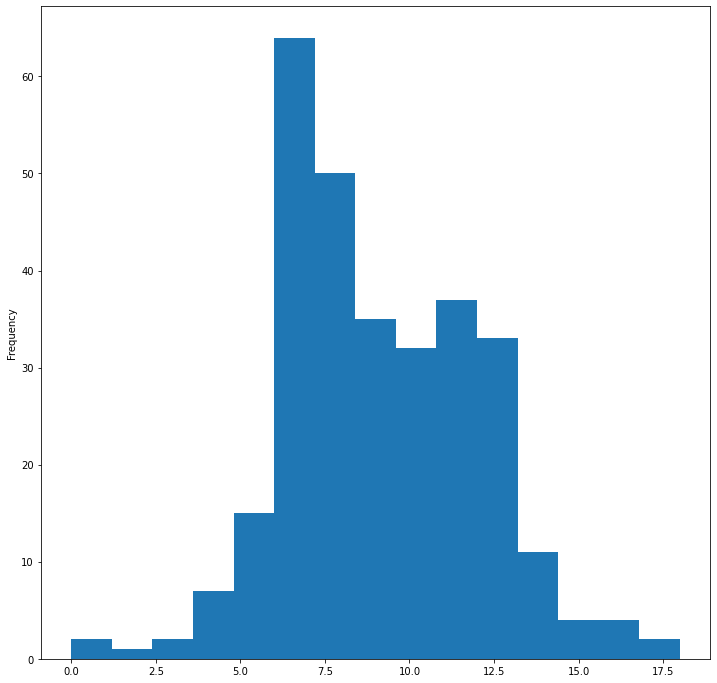

In [8]:
age.plot.hist(bins=15)

In [9]:
age.describe()

count    299.000000
mean       9.006689
std        2.892937
min        0.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       18.000000
Name: age at death, dtype: float64

<AxesSubplot:>

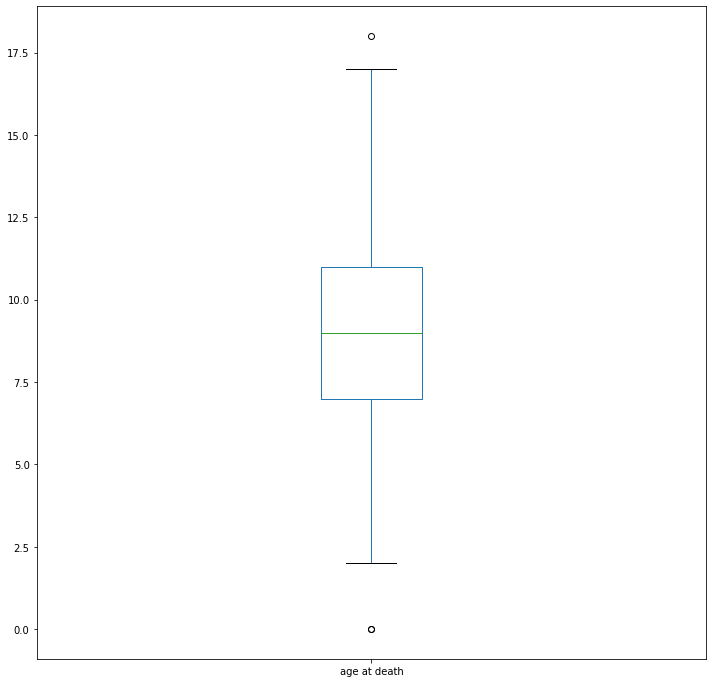

In [10]:
age.plot.box()

### with an average death age at 9, those cats died mostly at younger age

- SME Question: why those cats are died at younger age? 

This means the **data hypothesis 3** might play an important role in affecting cat's lifespan

In [11]:
## look at the death at age 0, which is an outlier of the data
age0 = data[data['age at death']==0]
age0

,age at death,breed,date of last vet visit,hair length,height,number of vet visits,weight
164,0.0,Rex,2007-07-20 22:28:24,0.936867,14.317804,9,1.0
288,0.0,Javanese,2003-04-07 10:02:49,0.950070,24.419723,10,3.0


### those records might be dirty data, the cat seems too big for their age 

In [12]:
## cat breed, https://www.petcarerx.com/article/the-average-lifespan-of-a-cat-breed-by-breed-chart/1698
data.breed.describe()

count            300
unique             6
top       Maine Coon
freq              68
Name: breed, dtype: object

### A good distribution of cat breed, however, only one sample for Donald type 
## TODO, handle the categories with significant less samples , such as change those category names to "others"

In [13]:
data.groupby(by='breed').count()

,age at death,date of last vet visit,hair length,height,number of vet visits,weight
breed,,,,,,
Donald,1,1,1,1,1,1
Javanese,58,58,58,58,58,58
Maine Coon,67,68,68,68,68,68
Manx,59,59,58,59,59,59
Rex,64,64,64,64,64,64
Siamese,50,50,50,50,50,50


In [14]:
breeds = data.groupby(by='breed')['breed'].count()

In [15]:
breeds.describe()

count     6.000000
mean     50.000000
std      24.762875
min       1.000000
25%      52.000000
50%      58.500000
75%      62.750000
max      68.000000
Name: breed, dtype: float64

<AxesSubplot:xlabel='breed'>

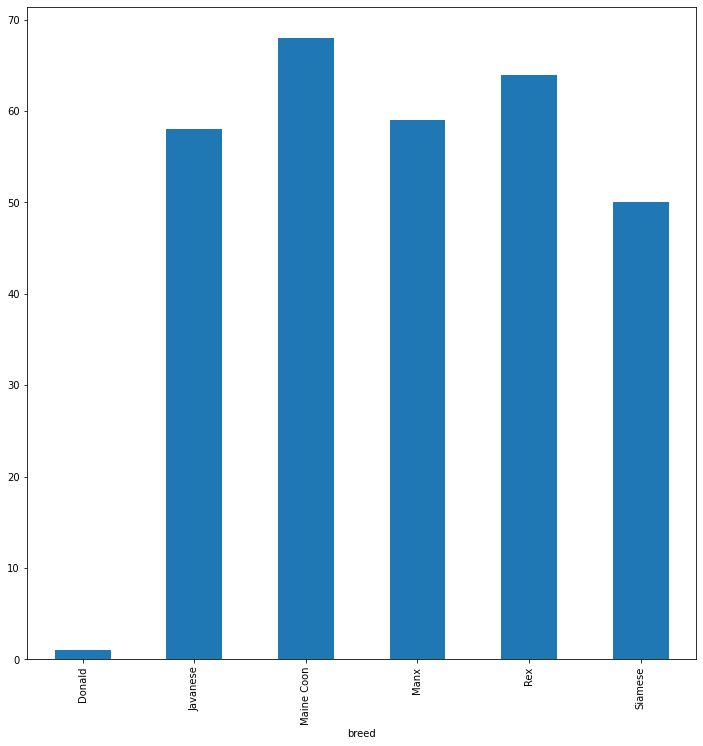

In [16]:
breeds.plot.bar()

In [17]:
## correlation of cat's lifespan and breed 
data.groupby(['breed'])['age at death'].mean()

breed
Donald        14.000000
Javanese       8.827586
Maine Coon     9.000000
Manx           9.135593
Rex            9.203125
Siamese        8.720000
Name: age at death, dtype: float64

<AxesSubplot:title={'center':'age at death'}, xlabel='breed'>

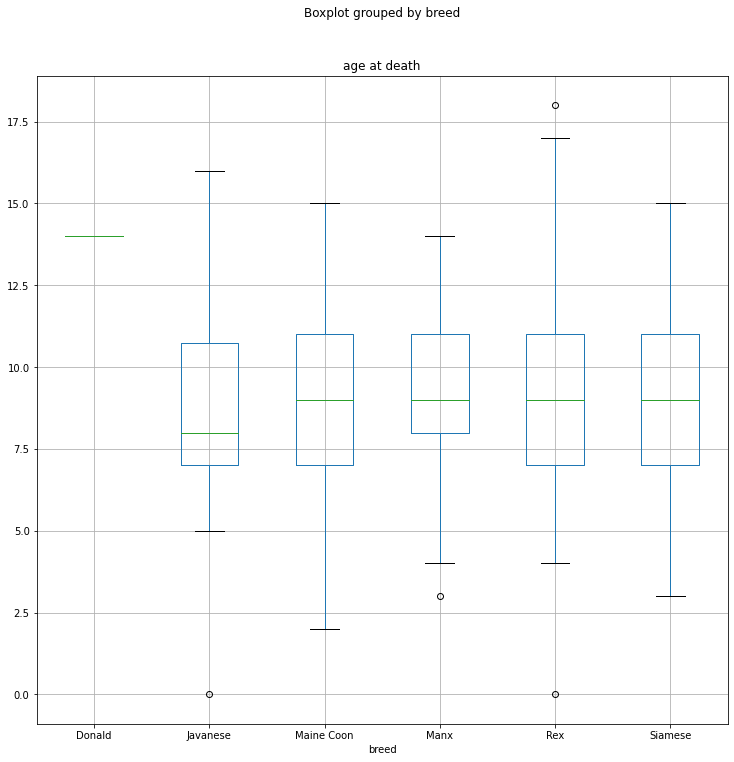

In [18]:
# data.groupby(['breed'])['age at death'].plot.box()
data.boxplot(column=['age at death'], by='breed')

### For different breed, the age at death is quite close. and the mean are all well below the normal lifespan of that breed. this can be an indication of many of those cats are experiencing poor health or some other common factors that leads to their early death

### Addition to data assumption 1: health condtion of the cats can impact on the cats lifespan
-  1.1. the weight,length and the number of vet visits data can give us an idea of health status of the cat 
-  1.2. the hair length may or may not directly link to cat's health, need domain knowledge 
-  1.3. lack of death time of the cat and the historical vet visit record, the last vet visit cannot be meanfully


In [19]:
# weight data
data.weight.describe()

count    300.000000
mean       3.957667
std        2.033624
min        0.000000
25%        2.000000
50%        4.000000
75%        5.250000
max       10.000000
Name: weight, dtype: float64

<AxesSubplot:title={'center':'weight'}, xlabel='breed'>

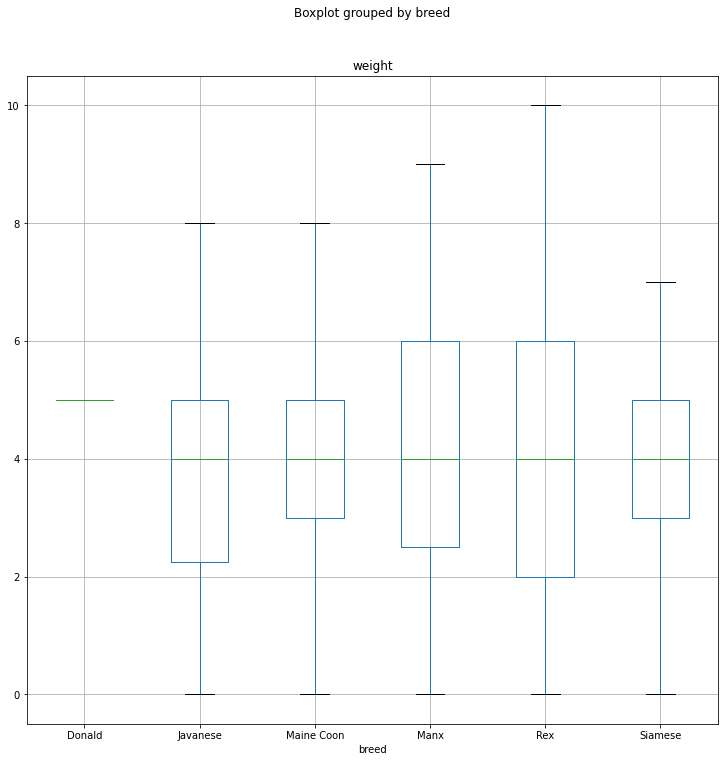

In [20]:
data.boxplot(column=['weight'], by='breed')

### The mean value of age at death for each breed type is the same, 
## This is a bit strange, as Javanese is smaller breed than Maine Coon, but they are sharing same distribution 
## Can be: 
- 1. the data is artificial  
- 2. there is a reason prevent Maine Coon to grow, which might interest for the business 


<AxesSubplot:xlabel='weight', ylabel='age at death'>

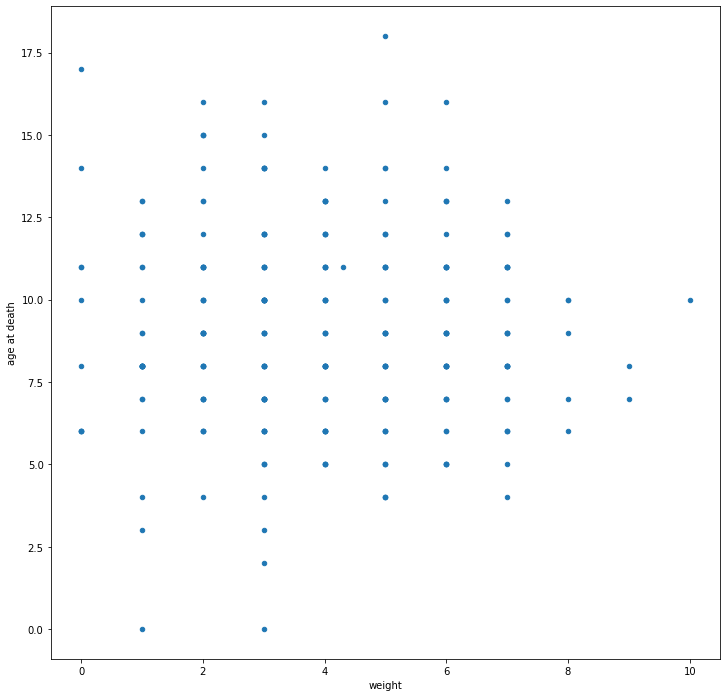

In [21]:
# data.boxplot(column=['weight'], by='breed')
data.plot.scatter(x='weight',
                      y='age at death')

### missing data at weight 0. 

<AxesSubplot:title={'center':'weight'}, xlabel='age at death'>

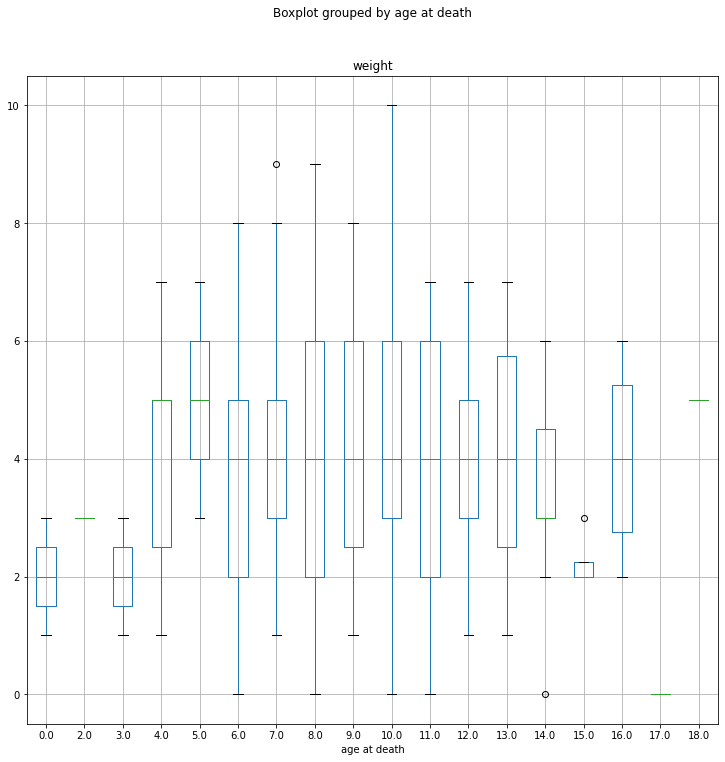

In [22]:
data.boxplot(column=['weight'], by='age at death')

### we treat age at death as an category data, and plot the weight distirbution of each age 

 most of the age at death has a similar mean of weight, which is making sense
 when cats were young (2-3 year old) they had less weight, the cat size is under weight  
 age 0 cat, can be the kitten dieds before reach age 1  
 several missing value data, 

<AxesSubplot:title={'center':'height'}, xlabel='age at death'>

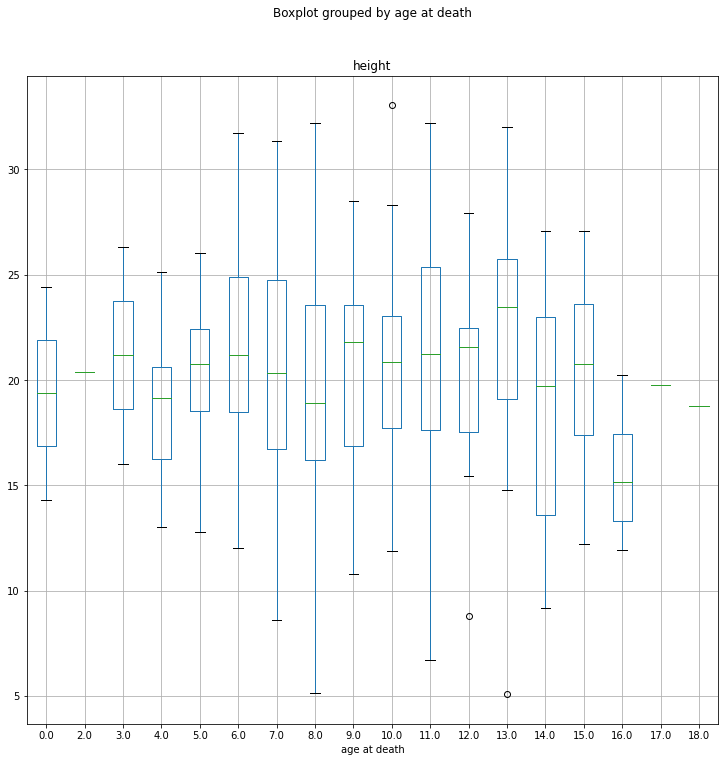

In [23]:
data.boxplot(column=['height'], by='age at death')

In [24]:
data.height.describe()

count    300.000000
mean      20.498442
std        5.107386
min        5.077179
25%       16.958241
50%       20.825805
75%       24.043067
max       33.043014
Name: height, dtype: float64

### all the age of cat shared the similar mean around 20, with std 5 cm. which is fit the common knowledge 
### some cats extremely small, less than 10 cm high, which is uncommon 

<AxesSubplot:title={'center':'number of vet visits'}, xlabel='age at death'>

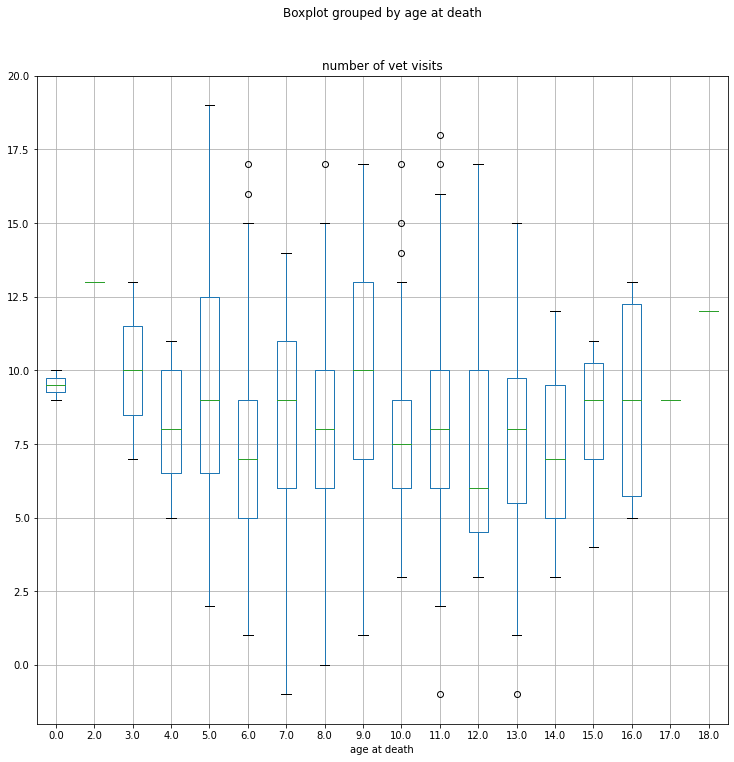

In [37]:
data.boxplot(column=['number of vet visits'], by='age at death')

In [38]:
data.height.describe()

count    300.000000
mean      20.498442
std        5.107386
min        5.077179
25%       16.958241
50%       20.825805
75%       24.043067
max       33.043014
Name: height, dtype: float64

### Assumption:
I was expecting to see as cat grow older, they should accumulate the number of visits to the vet. 
but the data showed a rather even mean and distribution cross different age. 
### this can mean: 
- 1. we might have data understanding issue, this can be num of visit vet per year  ?? 
- 2. the younger cat tends visit vet more when they are yound (1-3 years old), then stopped visiting vet after that,
    
need SME to verify

<AxesSubplot:title={'center':'hair length'}, xlabel='breed'>

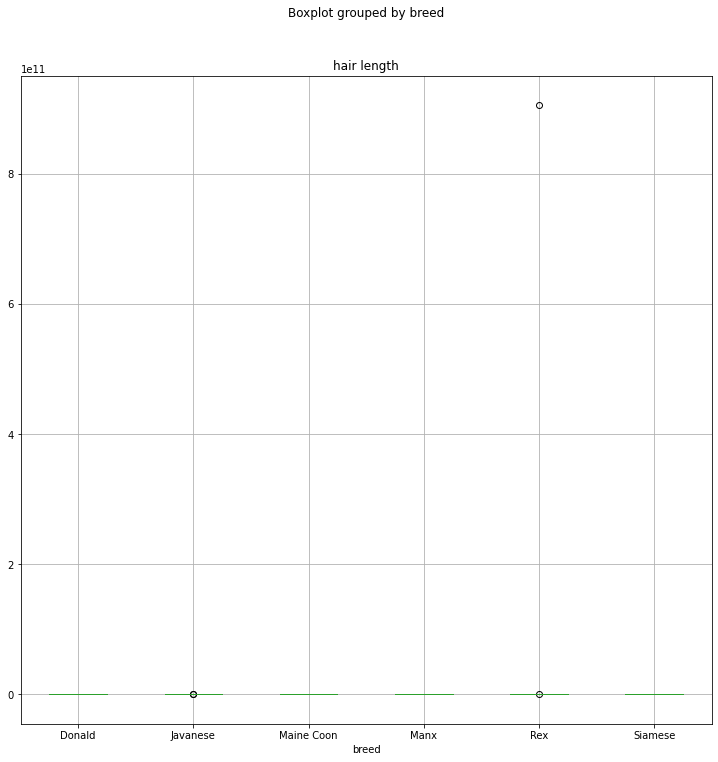

In [39]:
data.boxplot(column=['hair length'], by='breed')

<AxesSubplot:title={'center':'hair length'}, xlabel='breed'>

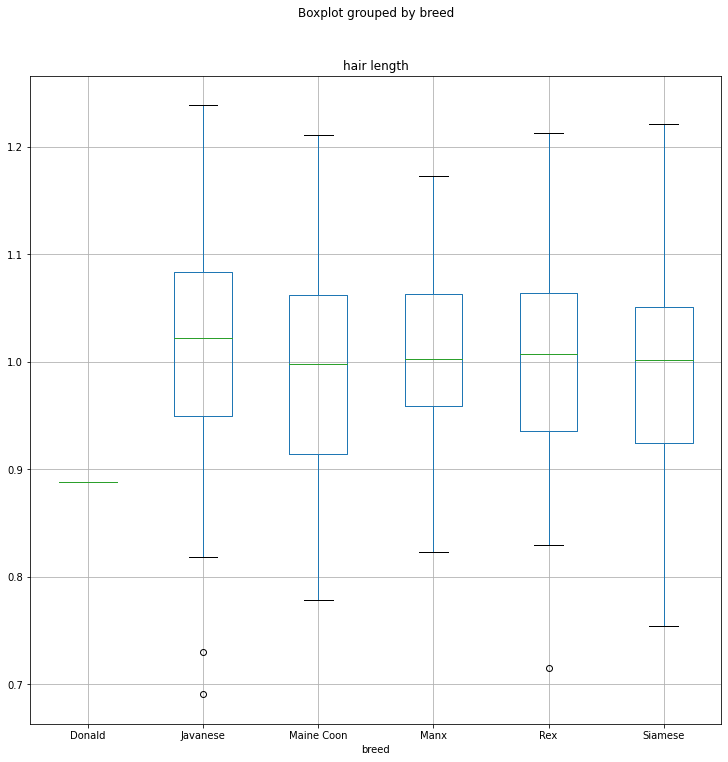

In [40]:
## filter out the outlier
data[(data['hair length']!= max(data['hair length']))].boxplot(column=['hair length'], by='breed')

### the hair length is not reflcting the common knowledge 
 Maine Coon is known for its long hair, and Rex is famous for its short hair, 
 but they share the same mean and distribution 

# Conclusion 

Need further discussion with client about data 
- Data is mostly in Hypothesis 1 category, with only one useful data point in  Hypothesis 3 category, so need to conduct data exploration with clien to further identify data sources for hypothesis 2 and 3
- Data pattern not reflecting domian knowledge, 
   1. the distribution of weight and hair length cross breed as almost the same, however, Maine Coon breed are known for their huge size and long hair, and Rex is known for their small size of short hair. 
   2. Some cats' height is way too small 
   3. Some cats' died at 0 age 
  
Need to understand why is the pattern, if the data were artificially generated, the client might be exploring what data they need to collect,then we can help to provide feedback and guidance. 

# Next Step

Data Process and build baseline model, then iterate on with additional data to improve accuracy 

**Key decisions**
1. remove "last data vet visit" and index column from model building
2. Handle exterme outliers, the one beyond quantile 99.9%, such as the one with hair length, but keep the others 
3. Keep the dirty data, such as "Die of age" 0, the future data might have the same kind of data, so the model training need to take that into consideration. 

## Please refer to the "Data preprocess and Modeling" notebook for the next step activities